In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import matplotlib.pylab  as  ptr 


from tabulate import tabulate

In [20]:
pf = pd.read_csv('../Documents/RegresionLineal.csv')

In [133]:
pf.astype('int32').dtypes

metro     int32
precio    int32
dtype: object

In [21]:
pf.head(3)

,metro,precio
0,5,375
1,15,487
2,20,450


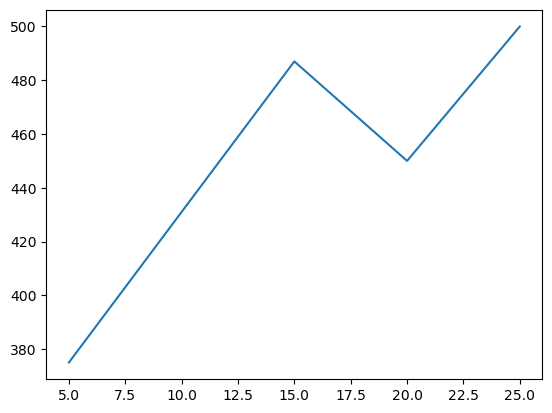

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(pf["metro"],pf["precio"])

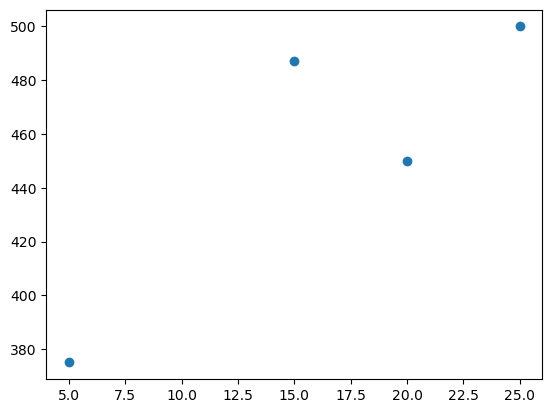

In [35]:
plt.scatter(pf["metro"], pf["precio"])

In [116]:
# Correlacion

metro = pf["metro"]
precio =pf["precio"]
print(metro.corr(precio), precio.cov(precio))

0.8586047206240953 3152.6666666666665


Intersección (b) 361.25714285714287
Pendiente (m) [5.64571429]


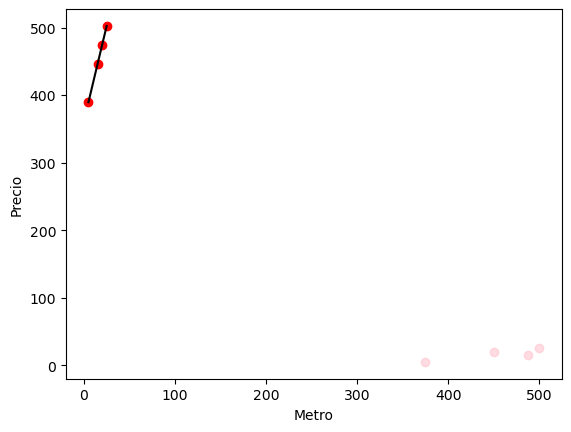

In [144]:
from sklearn import linear_model

regresion = linear_model.LinearRegression()

metro = pf["metro"].values.reshape((-1, 1))

modelo = regresion.fit(metro, pf["precio"])

print("Intersección (b)", modelo.intercept_)
print("Pendiente (m)", modelo.coef_)

entrada = [[5], [15], [20], [25]]
modelo.predict(entrada)

plt.scatter(entrada, modelo.predict(entrada), color="red")
plt.plot(entrada, modelo.predict(entrada), color="black")

plt.ylabel("Precio")
plt.xlabel("Metro")
plt.scatter(pf["precio"], pf["metro"], color="pink", alpha=0.55)
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.          1.04166667  2.08333333  3.125       4.16666667  5.20833333
  6.25        7.29166667  8.33333333  9.375      10.41666667 11.45833333
 12.5        13.54166667 14.58333333 15.625      16.66666667 17.70833333
 18.75       19.79166667 20.83333333 21.875      22.91666667 23.95833333
 25.        ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

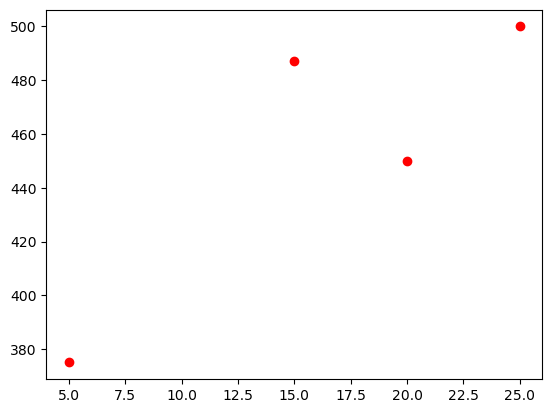

In [126]:
plt.scatter(X, y, color='red')
plt.plot(X, rl.predict(x), color='blue', linewidth=2)

In [80]:
# Hay Valores Nulos?
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   metro   4 non-null      int64
 1   precio  4 non-null      int64
dtypes: int64(2)
memory usage: 196.0 bytes


In [9]:
# Como se distribuyen las variables Numericas
pf.describe()

,metro,precio
count,4.000000,4.000000
mean,16.250000,453.000000
std,8.539126,56.148612
min,5.000000,375.000000
25%,12.500000,431.250000
50%,17.500000,468.500000
75%,21.250000,490.250000
max,25.000000,500.000000


In [10]:
pf.columns

Index(['metro', 'precio'], dtype='object')

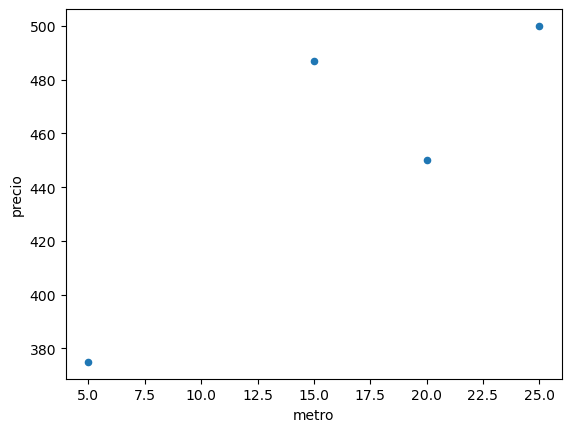

In [11]:
pf.plot.scatter(x='metro',y='precio')
plt.show()

In [99]:
#Parametos de la recta
w = 0
b = 400

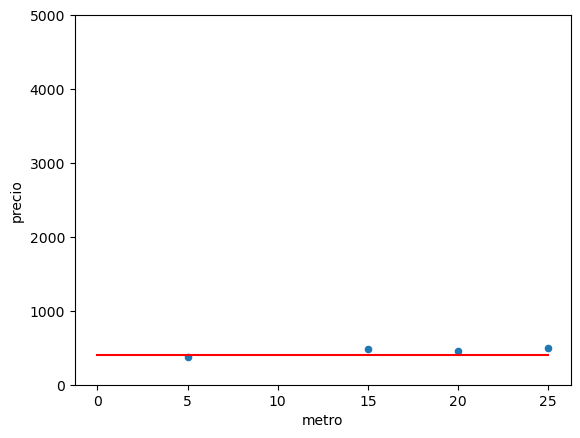

In [100]:
#Puntos de la recta 
x = np.linspace(0,pf['metro'].max(),25)
y = w*x+b

#grafica de la recta
pf.plot.scatter(x='metro',y='precio')
plt.plot(x, y, '-r')
plt.ylim(0,pf['precio'].max()*10)
# plt.grid()
plt.show()

In [62]:
pf['pred'] = pf['metro']*w+b

In [64]:
# calculo de la funcion de error
pf['diff'] = pf['pred']-pf['precio']
pf['cuad'] = pf['diff']**2
pf.head()

,metro,precio,pred,diff,cuad
0,5,375,2505,2130,4536900
1,15,487,7505,7018,49252324
2,20,450,10005,9555,91298025
3,25,500,12505,12005,144120025


In [65]:
# grid de la funcion de error basado en m, b=0
w = np.linspace(50,200,50)
grid_error = pd.DataFrame(w, columns=['w'])
grid_error.head()

,w
0,50.000000
1,53.061224
2,56.122449
3,59.183673
4,62.244898


In [71]:
def sum_error(w, pf):
    b=0
    pf['pred'] = pf['metro']*w+b
    pf['diff'] = pf['pred']-pf['precio']
    pf['cuad'] = pf['diff']**2
    return(pf['cuad'].mean())

In [72]:
grid_error['error']=grid_error['w'].apply(lambda x: sum_error(x, pf=pf))
grid_error.head()

,w,error
0,50.000000,237448.500000
1,53.061224,291052.883590
2,56.122449,350631.340483
3,59.183673,416183.870679
4,62.244898,487710.474177


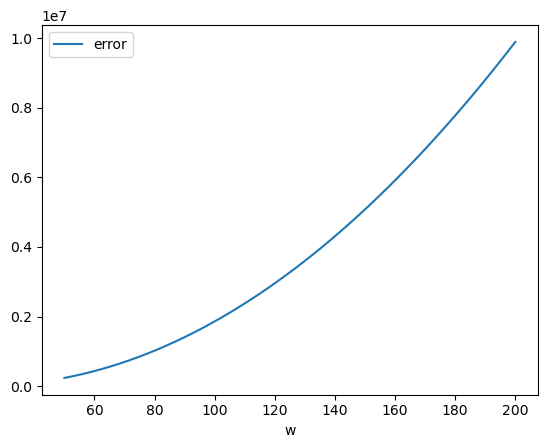

In [73]:
grid_error.plot(x='w',y='error')
plt.show()